In [16]:
pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#### Load Dataset

In [18]:
df = pd.read_csv("Mall_Customers.csv",index_col=0)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


#### Explore Data



In [19]:
df.rename({'Genre':"Gender"},axis=1, inplace=True)

In [20]:
df.shape

(200, 4)

In [21]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [23]:
df.rename(columns={'Annual Income (k$)':'Income',
                   'Spending Score (1-100)':'Score'},inplace=True)

In [24]:
df.head(2)

,Gender,Age,Income,Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81


---
---

## 2. Exploratory Data Analysis


In [25]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [26]:


df.describe(include='all', percentiles=[.1, .25, .5, .75, .95])

,Gender,Age,Income,Score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
10%,NaN,21.000000,23.900000,13.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000


In [27]:
df.groupby('Gender').describe().T

Gender            Female        Male
Age    count  112.000000   88.000000
       mean    38.098214   39.806818
       std     12.644095   15.514812
       min     18.000000   18.000000
       25%     29.000000   27.750000
       50%     35.000000   37.000000
       75%     47.500000   50.500000
       max     68.000000   70.000000
Income count  112.000000   88.000000
       mean    59.250000   62.227273
       std     26.011952   26.638373
       min     16.000000   15.000000
       25%     39.750000   45.500000
       50%     60.000000   62.500000
       75%     77.250000   78.000000
       max    126.000000  137.000000
Score  count  112.000000   88.000000
       mean    51.526786   48.511364
       std     24.114950   27.896770
       min      5.000000    1.000000
       25%     35.000000   24.500000
       50%     50.000000   50.000000
       75%     73.000000   70.000000
       max     99.000000   97.000000

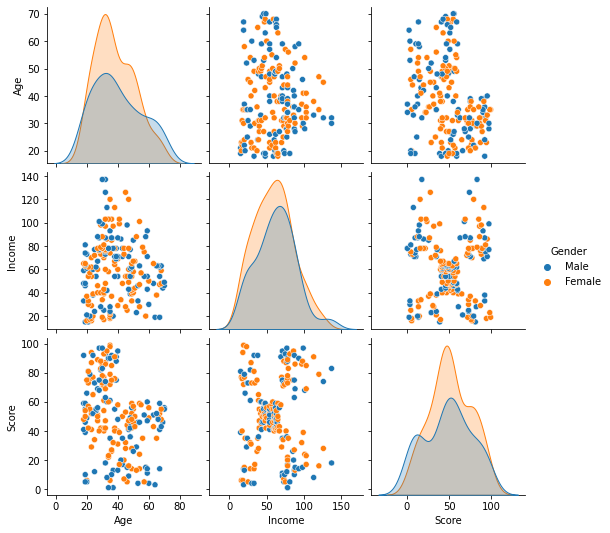

In [28]:
sns.pairplot(df,hue='Gender');

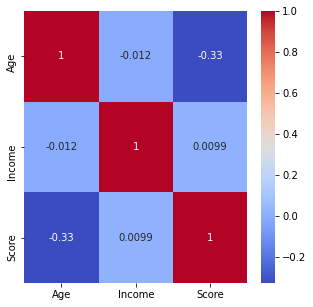

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

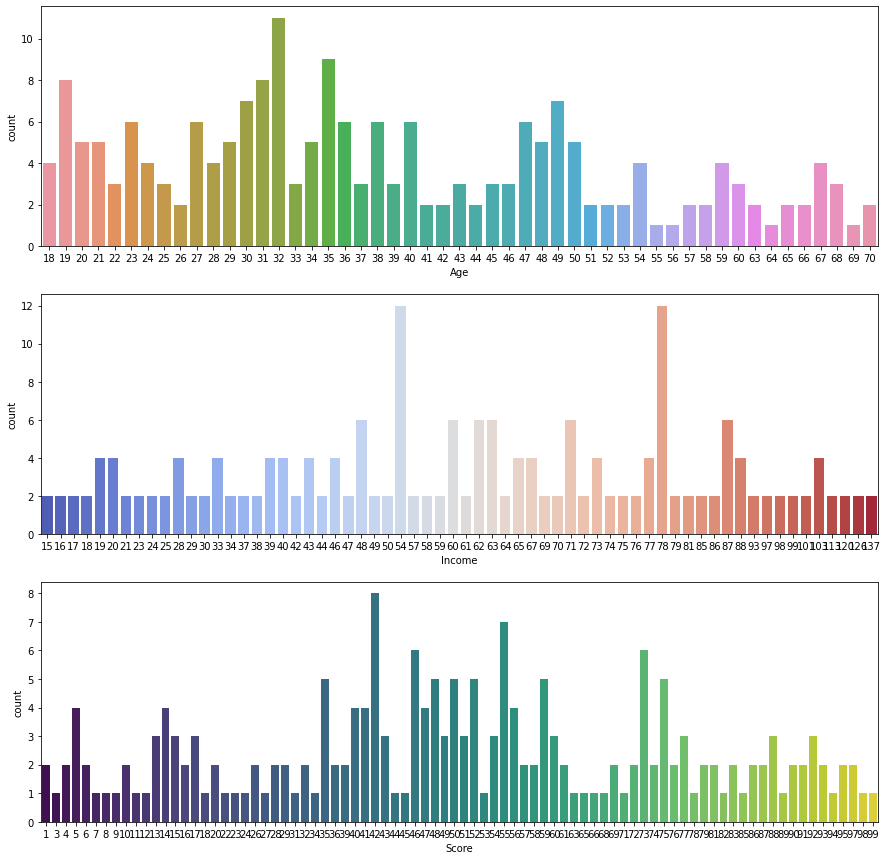

In [30]:
plt.figure(figsize=(15,15))
sns.countplot(x='Income', data=df)

plt.subplot(3,1,1)
sns.countplot(x='Age', data=df)

plt.subplot(3,1,2)
sns.countplot(x='Income', data=df, palette="coolwarm")

plt.subplot(3,1,3)
sns.countplot(x='Score', data=df,palette="viridis")
plt.show()

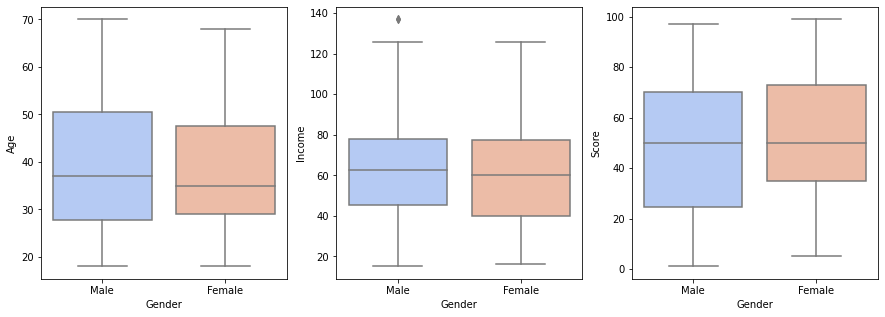

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Gender', y='Age', data=df, palette="coolwarm")

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='Income', data=df, palette="coolwarm")

plt.subplot(1,3,3)
sns.boxplot(x='Gender', y='Score', data=df, palette="coolwarm")
plt.show()

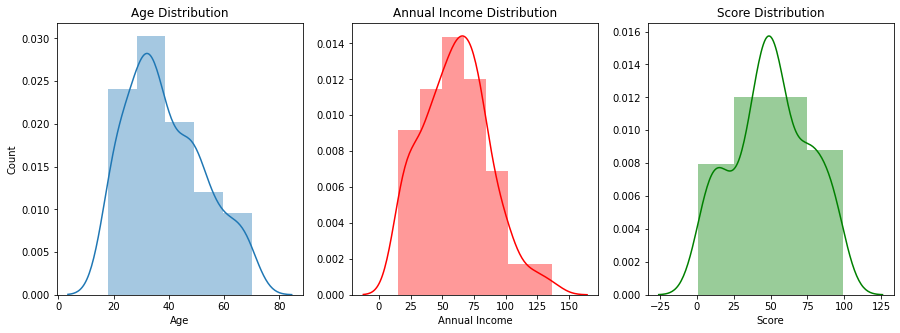

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df.Age,bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.distplot(df['Income'],color='red',bins=7)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('')

plt.subplot(1,3,3)
sns.distplot(df['Score'],color='green',bins=4)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('')
plt.show()

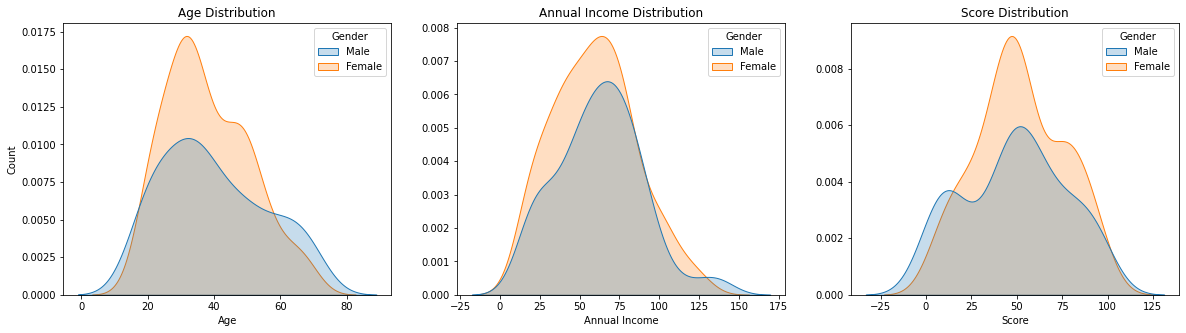

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(x='Age',data=df,hue="Gender",shade=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.kdeplot(x='Income',data=df,hue="Gender",shade=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('')

plt.subplot(1,3,3)
sns.kdeplot(x='Score',data=df,hue="Gender",shade=True)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('')
plt.show()

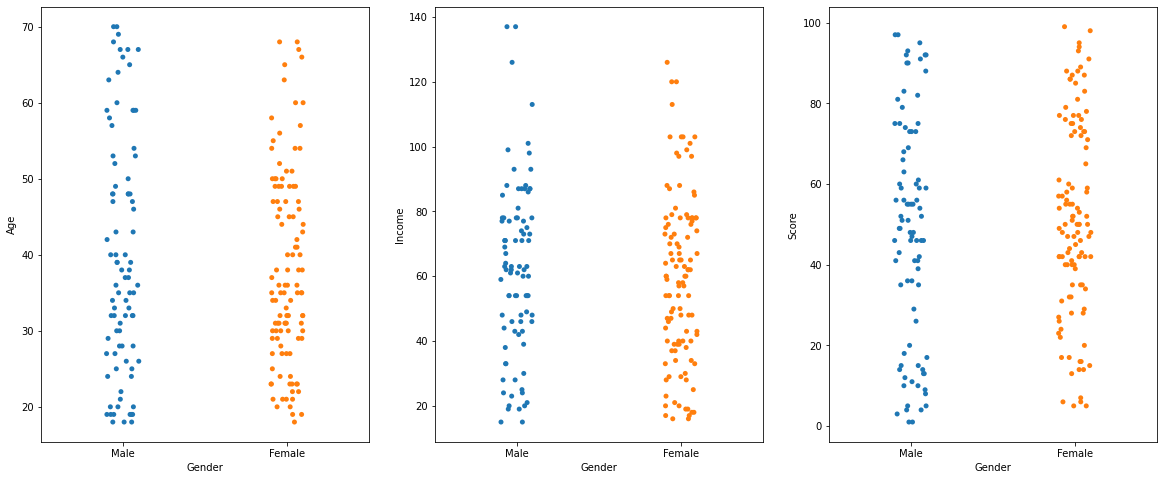

In [34]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.stripplot(df['Gender'], df['Age'])

plt.subplot(1,3,2)
sns.stripplot(df['Gender'], df['Income'])

plt.subplot(1,3,3)
sns.stripplot(df['Gender'], df['Score'])
plt.show()

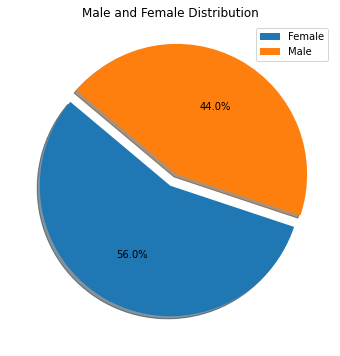

Female    112
Male       88
Name: Gender, dtype: int64

In [35]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')
plt.show()

df.Gender.value_counts(dropna=False)

In [36]:
df=pd.get_dummies(df,prefix='',prefix_sep='',drop_first=True)
df.head()

,Age,Income,Score,Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


---
---

## 3. Cluster Analysis

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [37]:
df1=df[['Age','Score']]
df1.head(2)

,Age,Score
CustomerID,,
1,19,39
2,21,81


**Hopkins Test**

In [38]:
from pyclustertend import hopkins
hopkins(df,df.shape[0])

0.3234261068345629

In [39]:
hopkins(scale(df),df.shape[0])

0.27336725159248615

#### *ii. Determine optimal number of clusters*

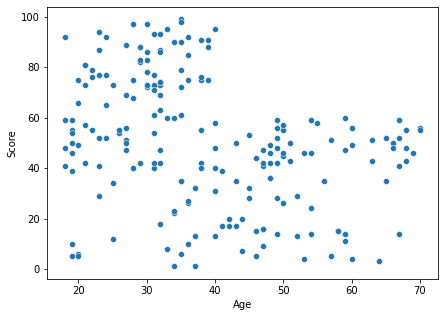

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age',y='Score',data=df1);

**Lets find k value given the highest Silhouette Score**

**`S(Silhouette) Score`**


In [41]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4692341232501655
Silhouette Score for 3 clusters: 0.45300127016521263
Silhouette Score for 4 clusters: 0.49973941540141753
Silhouette Score for 5 clusters: 0.467823614318914
Silhouette Score for 6 clusters: 0.44418989442824364
Silhouette Score for 7 clusters: 0.42313509747504796
Silhouette Score for 8 clusters: 0.42996983892561397
Silhouette Score for 9 clusters: 0.41129352743891984


**k=4 gives the highest S Score**

**`S(Silhouette) Score with scaled data`**

In [42]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(scale(df1))
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(scale(df1), model.labels_)}')

Silhouette Score for 2 clusters: 0.4721271643062346
Silhouette Score for 3 clusters: 0.43952990002101927
Silhouette Score for 4 clusters: 0.4383860846531993
Silhouette Score for 5 clusters: 0.42369111306686563
Silhouette Score for 6 clusters: 0.45314809188974353
Silhouette Score for 7 clusters: 0.40515754570573015
Silhouette Score for 8 clusters: 0.4010783178550834
Silhouette Score for 9 clusters: 0.42267065992489394


> **We got the highest S score with k=4. After scaling, S Score generally decreased. we will continue with unscaled data.**

### > **Elbow Method**

In [43]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df1))
    ssd.append(kmeans.inertia_)

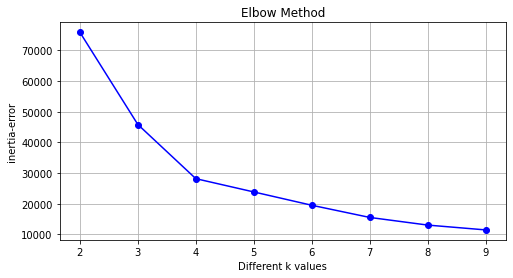

In [44]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

### > **Elbow Method with yellowbrick**

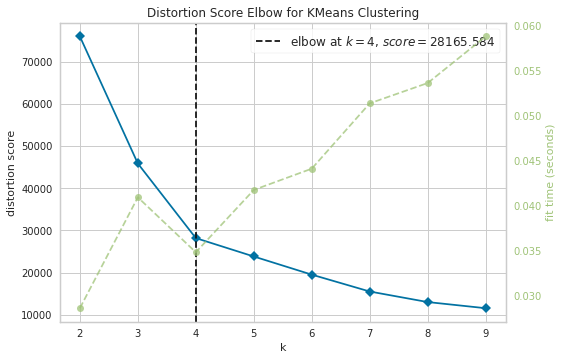

In [45]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df1)
visu.show();

#### *iii. Apply K Means*

In [46]:
kmeans = KMeans(n_clusters = 4).fit(df1)
labels = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

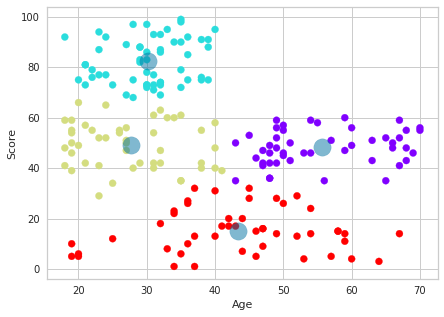

In [47]:
plt.figure(figsize=(7,5))
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,alpha=0.5, label = 'Centroids')
plt.xlabel(df1.columns[0])
plt.ylabel(df1.columns[1])
plt.show()

In [48]:
df['Age_Score_Clusters']=labels
df.head(5)

,Age,Income,Score,Male,Age_Score_Clusters
CustomerID,,,,,
1,19,15,39,1,2
2,21,15,81,1,1
3,20,16,6,0,3
4,23,16,77,0,1
5,31,17,40,0,2


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [49]:
df2=df[['Score','Income']]
df2.head(2)

,Score,Income
CustomerID,,
1,39,15
2,81,15


#### *ii. Determine optimal number of clusters*

**Lets find k value given the highest Silhouette Score**

**`S(Silhouette) Score`**

In [50]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, model.labels_)}')

Silhouette Score for 2 clusters: 0.2968969162503008
Silhouette Score for 3 clusters: 0.46761358158775435
Silhouette Score for 4 clusters: 0.4931963109249047
Silhouette Score for 5 clusters: 0.553931997444648
Silhouette Score for 6 clusters: 0.5379675585622219
Silhouette Score for 7 clusters: 0.5288104473798049
Silhouette Score for 8 clusters: 0.4579252386192864
Silhouette Score for 9 clusters: 0.4565077334305076


**k=5 gives the highest S Score**

### > **Elbow Method**

In [51]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df2))
    ssd.append(kmeans.inertia_)

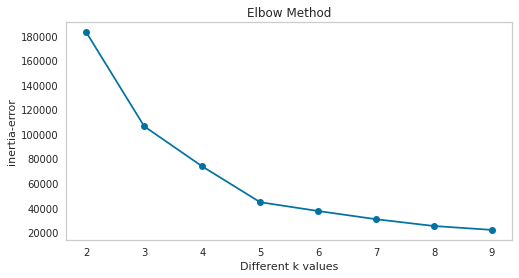

In [52]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

### > **Elbow Method with yellowbrick**

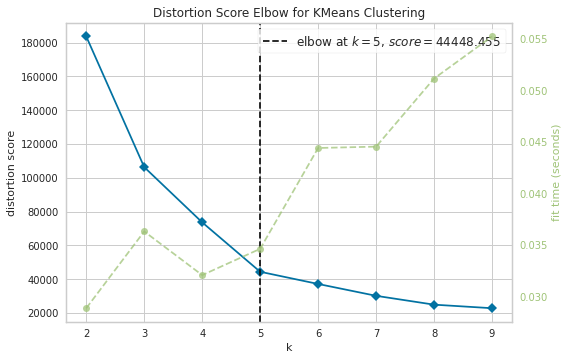

In [53]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df2)
visu.show();

#### *iii. Apply K Means*

In [54]:
kmeans = KMeans(n_clusters = 5).fit(df2)
labels = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

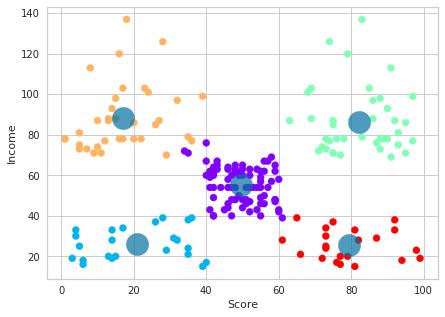

In [55]:
plt.figure(figsize=(7,5))
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,alpha=0.7, label = 'Centroids')
plt.xlabel(df2.columns[0])
plt.ylabel(df2.columns[1])
plt.show()

In [56]:
df['Score_Income_Clusters']=labels
df.head(5)

,Age,Income,Score,Male,Age_Score_Clusters,Score_Income_Clusters
CustomerID,,,,,,
1,19,15,39,1,2,1
2,21,15,81,1,1,4
3,20,16,6,0,3,1
4,23,16,77,0,1,4
5,31,17,40,0,2,1


### Clustering based on Annual Income and Age

#### *i. Create a new dataset with two variables of your choice*

In [57]:
df3=df[['Age','Income']]
df3.head(2)

,Age,Income
CustomerID,,
1,19,15
2,21,15


In [58]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df3)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df3, model.labels_)}')

Silhouette Score for 2 clusters: 0.42620850066216065
Silhouette Score for 3 clusters: 0.4245960102906784
Silhouette Score for 4 clusters: 0.43295184273333076
Silhouette Score for 5 clusters: 0.40157587536205724
Silhouette Score for 6 clusters: 0.3962104118856793
Silhouette Score for 7 clusters: 0.3847788881476079
Silhouette Score for 8 clusters: 0.3912533309456338
Silhouette Score for 9 clusters: 0.3987620292294324


**k=4 gives the highest S Score**

In [59]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df3))
    ssd.append(kmeans.inertia_)

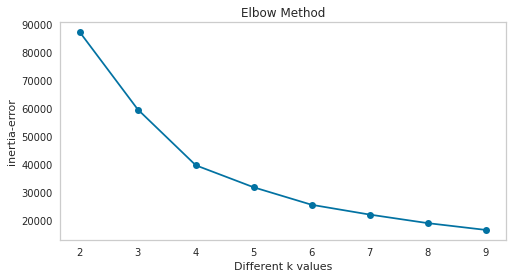

In [60]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

> **Elbow Method with yellowbrick**

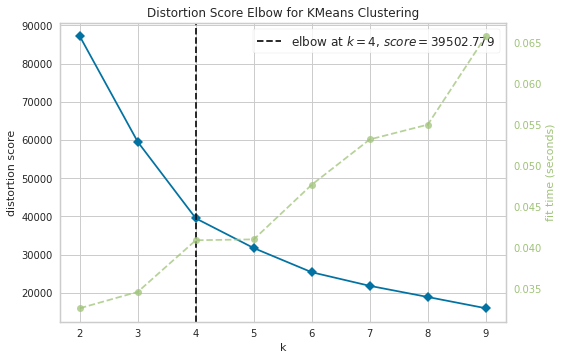

In [61]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df3)
visu.show();

#### *iii. Apply K Means*

In [62]:
kmeans = KMeans(n_clusters = 4).fit(df3)
labels = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

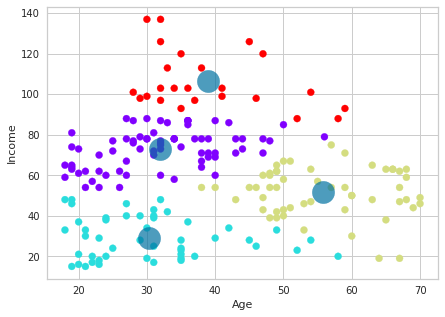

In [63]:
plt.figure(figsize=(7,5))
plt.scatter(df3.iloc[:,0],df2.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,alpha=0.7, label = 'Centroids')
plt.xlabel(df3.columns[0])
plt.ylabel(df3.columns[1])
plt.show()

In [64]:
df['Age_Income_Clusters']=labels

In [65]:
df.drop(['Age_Score_Clusters','Score_Income_Clusters', 'Age_Income_Clusters'],axis=1,inplace=True)
df_backup=df.copy()

In [66]:
df.drop(['Male'],axis=1,inplace=True)

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

**Hierarchy Clustering**

In [67]:
# hc_complete =  linkage(df,"complete")
hc_ward = linkage(df, "ward")
# hc_single = linkage(df, "single")

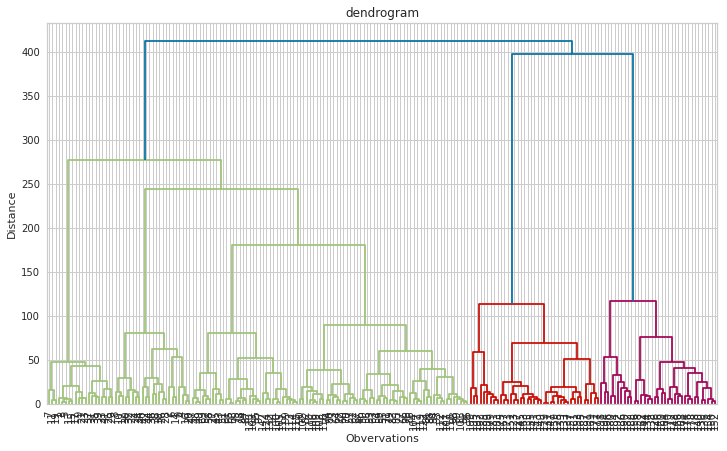

In [68]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [69]:
hc = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward')
hc.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [70]:
print(f'Silhouette Score(n=5): {silhouette_score(df, hc.labels_)}')

Silhouette Score(n=5): 0.4401889024290193


In [71]:
df["hc_clusters"] = hc.labels_
df.sample(5)

,Age,Income,Score,hc_clusters
CustomerID,,,,
97,47,60,47,0
141,57,75,5,1
15,37,20,13,4
92,18,59,41,0
18,20,21,66,3


In [72]:
df.groupby('hc_clusters').mean()

,Age,Income,Score
hc_clusters,,,
0,42.156627,54.759036,49.771084
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205
3,24.850000,24.950000,81.000000
4,45.217391,26.304348,20.913043


**`K-Means`**

In [73]:
kmeans = KMeans(n_clusters = 5).fit(df[['Age', 'Income', 'Score']])
kmeans.fit_predict(df[['Age', 'Income', 'Score']])
labels = kmeans.labels_
df["kmeans_clusters"] = labels

In [74]:
df.groupby('kmeans_clusters').mean()

,Age,Income,Score,hc_clusters
kmeans_clusters,,,,
0,25.521739,26.304348,78.565217,2.608696
1,43.088608,55.291139,49.569620,0.012658
2,32.692308,86.538462,82.128205,2.000000
3,45.217391,26.304348,20.913043,4.000000
4,40.666667,87.750000,17.583333,0.944444


 **K_Means vs HC**

In [75]:
pd.crosstab(df.kmeans_clusters,df.hc_clusters)

hc_clusters,0,1,2,3,4
kmeans_clusters,,,,,
0,3,0,0,20,0
1,78,1,0,0,0
2,0,0,39,0,0
3,0,0,0,0,23
4,2,34,0,0,0


#### iii. *Visualizing and Labeling All the Clusters* 

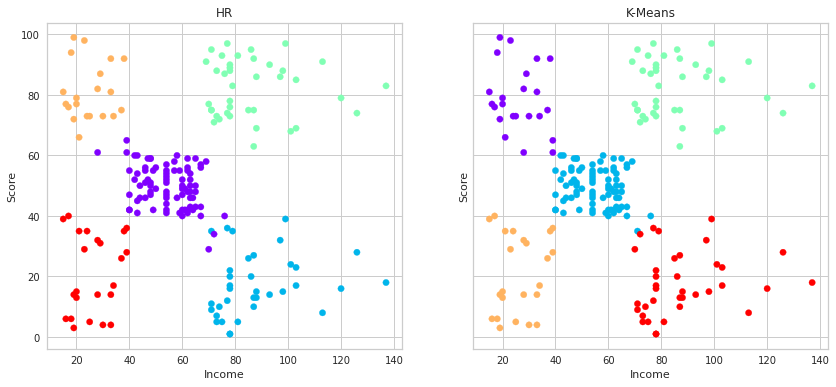

In [76]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6)) # sharey=True ile y eksen labels lari ortak kullanirlar.
ax1.set_title('HR')
ax1.set_xlabel('Income')
ax1.set_ylabel('Score')
ax1.scatter(df.iloc[:,1], df.iloc[:,2], c = df.hc_clusters, s = 40, cmap = "rainbow") # s=40 ,dot size
ax2.set_title("K-Means")
ax2.set_xlabel('Income')
ax2.set_ylabel('Score')
ax2.scatter(df.iloc[:,1], df.iloc[:,2], c = df.kmeans_clusters, s = 40, cmap = "rainbow");

In [77]:
# HC Clustering
silhouette_score(df.drop(['kmeans_clusters','hc_clusters'],axis=1), hc.fit_predict(df))

0.44038193536904197

In [78]:
# K-Means Clustering
silhouette_score(df.drop(['kmeans_clusters','hc_clusters'],axis=1), kmeans.fit_predict(df))

0.44428597560893024

> **We can say K-means Clustering Model is more succesful. Its S Score is higher than HC**

**Visualization of Clusters in 3D**

In [79]:
from mpl_toolkits.mplot3d import Axes3D

kmeans= KMeans(n_clusters=5).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

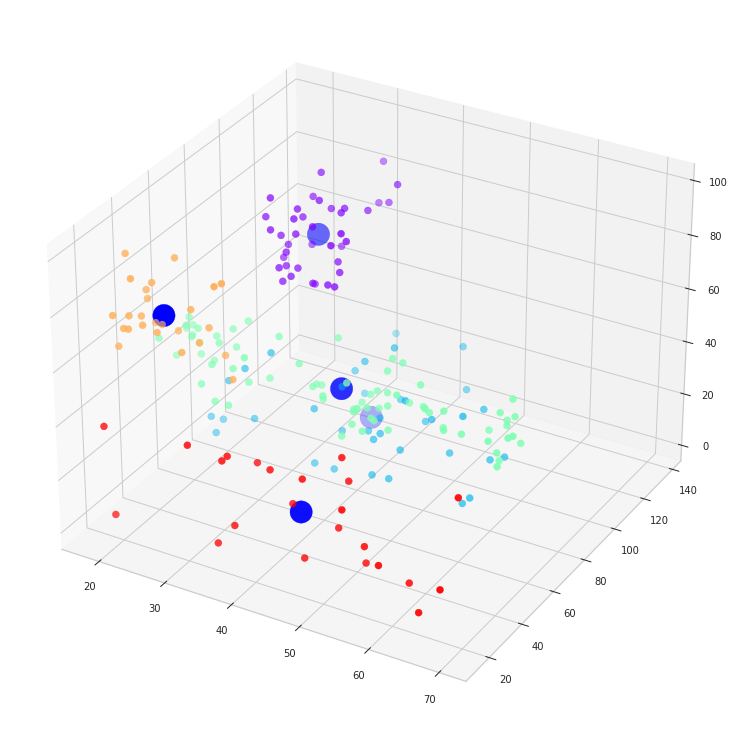

In [80]:
plt.rcParams["figure.figsize"] =(10,10)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "rainbow")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="blue",marker="o",s = 500);

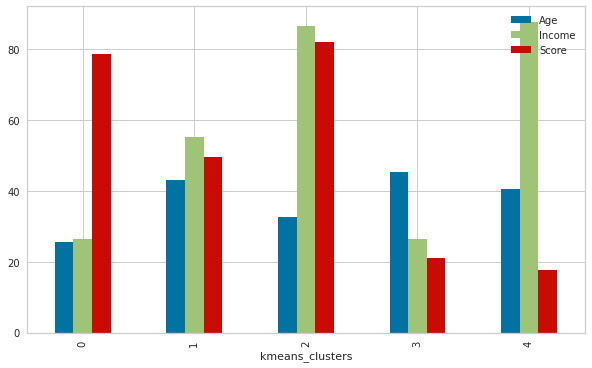

In [81]:
df.drop(['kmeans_clusters','hc_clusters'],axis=1).groupby(df.kmeans_clusters).mean().plot(figsize = (10,6), kind='bar')
plt.show()

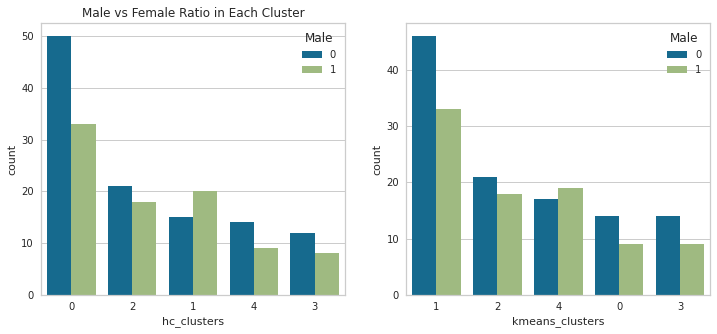

In [82]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='hc_clusters', data=df.merge(df_backup), hue='Male',order = df['hc_clusters'].value_counts().index)
plt.title("Male vs Female Ratio in Each Cluster")

plt.subplot(1,2,2)
sns.countplot(x='kmeans_clusters', data=df.merge(df_backup), hue='Male', order = df['kmeans_clusters'].value_counts().index)
plt.show()

### Conclusion

**1st group(Orange):** Low income, low spending score


**2nd group(Green):** High income, low spending score

**3rd group(Blue):** Moderate income, moderate spending score


**4th group(Red):** Low income, high spending score


**5th group(Purple):** High income, high spending score
